# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
    
### <font color=blue><center> Quests 3
<font color=black><center> Após realizar as missões dos murais da Taverna do Sol e da Praça da Fonte e deixar seus relatórios nas mãos da Dra. Diana Didatolov, a Divisão Clareyamar ganhou muito mais reconhecimento e prestígio no reino. Com as missões anteriores concluídas, a Diretora da Biblioteca Real revelou ao grupo mais um mural que contém quests de nível mais elevado , solicitando ajuda a eles. A fim de continuar ajudando o povo e conquistar a Legião da Alvorada, o grupo aceitou e se propôs, novamente, a resolver problemas de diversos cidadãos de Lumi. Além disso, há relatos de que as águas locais estão contaminadas, e sábios marinheiros afirmaram avistar um terrível dragão do mar na região. Conhecendo esses rumores, como divisão responsável pelos recursos hídricos, o grupo decidiu se preparar para estudar o que está acontecendo no Reino de Lumi.
    
##### <font color=darkred><center> Missão 3: Tentando algo diferente
<div class="alert alert-warning">
<center> "Escolha um dos seguintes algoritmos de aprendizado de máquina: Support Vector Machine, Naive Bayes ou Gaussian Proccesses. Sua tarefa é entender como este algoritmo funciona e reportar isso de maneira clara e didática. Induza um modelo utilizando este algoritmo nos dados que pretende usar no seu projeto de conclusão do semestre desta disciplina"
</div>
    
<font color=darkred><center> Introdução da missão 3 - Modelos 6<br>
<font color=black> O guerreiro Ricardo Girardo, em uma de suas empreitadas noturnas caçando gralhas na floresta (que todos os habitantes de Lumi fingem não saber que se trata, na realidade, da improficiência do rapaz com um alaúde, para não decepcioná-lo), notou uma estranha coloração e odor vindo de um córrego da região, indicando uma poluição inesperada no sistema hídrico local. Sabendo que as águas do Reino de Lumi estão potencialmente contaminadas, a Divisão Clareyamar se preocupou, primeiramente, em analisar quais riachos que cortam o território ainda apresentam água potável para sustentar a população. Desse modo, o grupo estudou o algoritmo *Support Vector Machines* ou Máquinas de Vetores de Suporte para, a partir de dados de pH, cloraminas e turbidez de algumas amostras de água, classificar se tais amostras são ou não próprias para o consumo. Para isso, em primeiro lugar, a equipe aplicou o algoritmo aos dados de pinguins de Lumi para entender seu funcionamento e, posteriormente, utilizá-lo para prever a potabilidade dos rios.

# <font color=darkred>*Support Vector Machines*
    
*Support Vector Machines*, ou Máquinas de Vetores de Suporte, são algoritmos de aprendizado de máquina supervisionado que podem ser utilizados tanto para classificação quanto para regressão - sendo o último uma extensão do primeiro.
    
Para a classificação de dados, as SVM's definem hiperplanos que separem as classes dos dados. Tais hiperplanos são definidos pelos vetores suporte - os pontos mais próximos das demais classes -, de modo que a distância entre estes vetores e o hiperplano encontrado - a qual é chamada de margem - seja maximizada.
    
!["Classificador de Vetores de Suporte"](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/330px-Svm_separating_hyperplanes_%28SVG%29.svg.png)
<font color=darkred><center>Classificador de Vetores de Suporte: o hiperplano $H_3$ é o melhor encontrado, separando as classes com as margens maximizadas. (fonte: Wikipédia)
    
Já para problemas de regressão, os hiperplanos são definidos buscando delimitar regiões que minimizem o erro das previsões. 
    
Neste caderno, implementamos o classificador `SVC` do módulo `Scilit-learn`, prevendo a espécie de pinguins com dados da biblioteca `Seaborn` e a potabilidade de corpos d'água com dados da plataforma `Kaggle`.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### <font color=darkred>Importando dados de pinguins 

In [2]:
df_p = sb.load_dataset("penguins")
df_p = df_p.dropna()
df_p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Para fins didáticos, aplicaremos o algoritmo ao *dataset* utilizando como atributos o comprimento e a profundidade de bico dos pinguins, visando prever sua espécie. Desse modo, podemos plotar os dados com diferentes cores relacionadas às classes - ou espécies dos pinguins estudados.

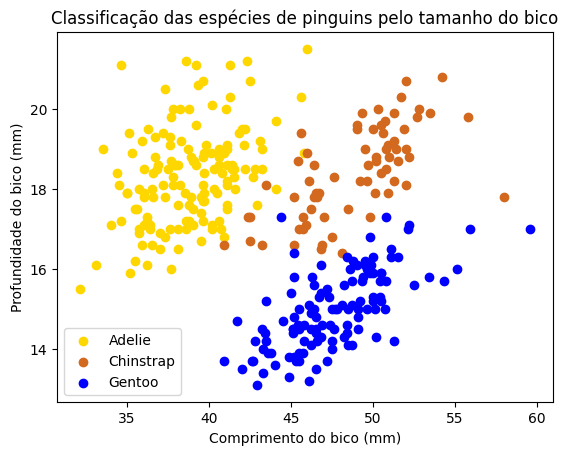

In [3]:
n = len(df_p)

bico_comp = list(df_p["bill_length_mm"])
bico_prof = list(df_p["bill_depth_mm"])
spc = list(df_p["species"])

bcomp_a = []
bprof_a = []
bcomp_c = []
bprof_c = []
bcomp_g = []
bprof_g = []

for i in range(n):
    if spc[i]== "Adelie":
        bcomp_a.append(bico_comp[i])
        bprof_a.append(bico_prof[i])
    elif spc[i]== "Chinstrap":
        bcomp_c.append(bico_comp[i])
        bprof_c.append(bico_prof[i])
    elif spc[i] == "Gentoo":
        bcomp_g.append(bico_comp[i])
        bprof_g.append(bico_prof[i])

#plotagem dos dados
plt.scatter(bcomp_a,bprof_a, color = "gold", label = "Adelie")
plt.scatter(bcomp_c,bprof_c, color = "chocolate", label = "Chinstrap")
plt.scatter(bcomp_g,bprof_g, color = "blue", label = "Gentoo")
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Profundidade do bico (mm)")

plt.title("Classificação das espécies de pinguins pelo tamanho do bico")
plt.legend()
plt.show()

Faremos também uma divisão dos dados em grupos de treino e teste para avaliar a eficiência do classificador treinado.

In [4]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2810024

indices = df_p.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

p_treino = df_p.loc[indices_treino]
p_teste = df_p.loc[indices_teste]

In [5]:
p_treino

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
108,Adelie,Biscoe,38.1,17.0,181.0,3175.0,Female
38,Adelie,Dream,37.6,19.3,181.0,3300.0,Female
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female
95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,Female
...,...,...,...,...,...,...,...
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,Male
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
205,Chinstrap,Dream,50.7,19.7,203.0,4050.0,Male


In [6]:
p_teste

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,Female
135,Adelie,Dream,41.1,17.5,190.0,3900.0,Male
320,Gentoo,Biscoe,48.5,15.0,219.0,4850.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,Male
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,Female


#### <font color="darkred">Definindo os melhores hiperplanos
    
É preciso notar que nem todos os dados podem ser linearmente dividios - isto é, nem sempre definir um hiperplano linear para classificar os dados trabalhdados. Assim, uma estratégia utilizada é definir hiperparâmetros não-lineares que se adaptem melhor à separação dos dados. No `SVC` do `scikit-learn`, são definidos três tipos principais de kernel que definem o comportamento dos hiperplanos: "linear", que define hiperplanos com expressões de primeiro grau; "poly", que define hiperplanos com expressões polinomiais de grau maior que um; e "rbf", que define hiperplanos com expressões exponenciais - sendo "rbf" o padrão. Neste caderno, trabalharemos apenas com `SVC(kernel="linear")` e o padrão `SVC()` ou `SVC(kernel="rbf")`.
    
![kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)<font color=darkred><center>Tipos de kernel utilizados pelo `SVC` aplicados a dados de flores do dataset `Iris` do `Seaborn`. O modelo `LinearSCV` define exclusivamente hiperplanos lineares. (fonte: scikit-learn)
    
É importante perceber, também, que muitas vezes alguns elementos de diferentes classes se sobrepõem. Desse modo, muitas vezes o hiperplano é definido com tais vetores dentro da margem, e não a delimitando.
    
Primeiramente, vamos prever a espécie dos pinguins usando `SVC(kernel="linear")`.

In [7]:
from sklearn.svm import SVC 

modelo_l = SVC(kernel = "linear")

modelo_l.fit(p_treino[["bill_length_mm", "bill_depth_mm"]], p_treino[["species"]])

previsoes_pl = modelo_l.predict(p_teste[["bill_length_mm", "bill_depth_mm"]])

acertos = []
for i,j in zip(p_teste["species"],previsoes_pl):
    if i == j:
        acertos.append(True)
    else:
        acertos.append(False)

pl_results = {
    "Target": p_teste["species"],
    "Previsões" : previsoes_pl,
    "Acertou?": acertos
}

df_pl_res = pd.DataFrame.from_dict(pl_results)
df_pl_res

c:\venv\ilumpy\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Target,Previsões,Acertou?
228,Gentoo,Gentoo,True
109,Adelie,Adelie,True
225,Gentoo,Gentoo,True
135,Adelie,Adelie,True
320,Gentoo,Gentoo,True
340,Gentoo,Gentoo,True
249,Gentoo,Gentoo,True
37,Adelie,Adelie,True
127,Adelie,Adelie,True
288,Gentoo,Gentoo,True


Feita a previsão das classes, é possível recuperar os coeficientes que acompanham os atributos e o intercepto das expressões dos hiperplanos:

In [8]:
a = modelo_l.coef_
b = modelo_l.intercept_

print(f"Os coeficientes encontrados pelo algoritmo foram:" )
print(f"{a}.")
print("")
print(f"Os interceptos encontrados pelo algoritmo foram: {b}.")

Os coeficientes encontrados pelo algoritmo foram:
[[-0.89099368  1.32279199]
 [-0.40198575  0.89671254]
 [-0.22639858  1.5527932 ]].

Os interceptos encontrados pelo algoritmo foram: [ 14.77610144   2.4633147  -15.05178055].


Note que os coeficientes foram retornados como uma matriz de 3 linhas e 2 colunas, em que cada linha representa um hiperplano e cada coluna representa um atributo. Assim, a expressão de cada hiperplano é dada por:

$$
H_1: -0.9x_1 + 1.3x_2 + 14.8 = 0 \therefore x_2 = \frac{-0.9x_1 + 14.8}{-1.3}
$$

$$
H_2:-0.4x_1 +0.9x_2 + 2.5 = 0 \therefore x_2 = \frac{-0.4x_1 + 2.5 }{-0.9}
$$ 

$$
H_3: -0.2x_1 + 1.6x_2 + 15.1 = 0 \therefore x_2 =  \frac{-0.2x_1 + 15.1}{-1.6}
$$

Tendo as expressões dos hiperplanos, é possível plotá-los no gráfico que representa os dados. O hiperplano $H_3$ delimita a espécie Gentoo por baixo, então o desconsideraremos.

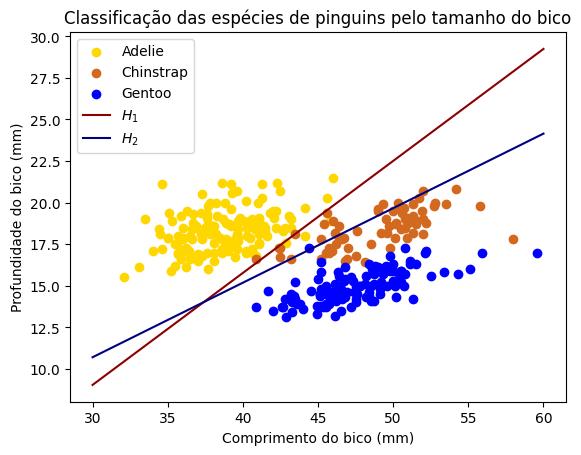

In [9]:
h1_x = [30,60]
h1_y = [(a[0][0]*30 + b[0])/-a[0][1], (a[0][0]*60 + b[0])/-a[0][1]]

h2_x = [30,60]
h2_y = [(a[1][0]*30 + b[1])/-a[1][1], (a[1][0]*60 +b[1])/-a[1][1]]

plt.scatter(bcomp_a,bprof_a, color = "gold", label = "Adelie")
plt.scatter(bcomp_c,bprof_c, color = "chocolate", label = "Chinstrap")
plt.scatter(bcomp_g,bprof_g, color = "blue", label = "Gentoo")
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Profundidade do bico (mm)")

plt.plot(h1_x,h1_y, color = "darkred", label = "$H_1$")
plt.plot(h2_x,h2_y, color = "navy", label = "$H_2$")

plt.title("Classificação das espécies de pinguins pelo tamanho do bico")
plt.legend()
plt.show()

Podemos, ainda, plotar a matriz de confusão e calcular as métricas obtidas pelo `SVC`:

[Text(0.5, 23.52222222222222, 'PREVISÕES'),
 Text(50.722222222222214, 0.5, 'TARGET')]

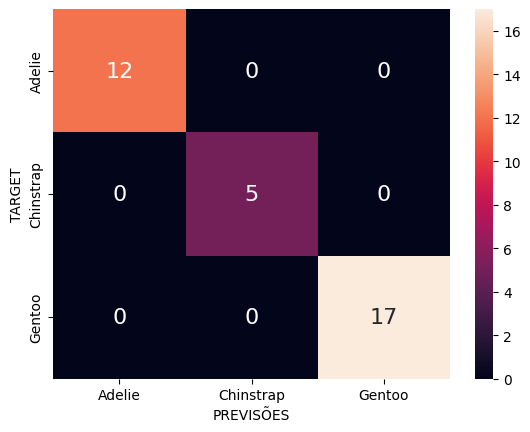

In [10]:
from sklearn.metrics import confusion_matrix

ordem_labels = ordem_labels = df_p["species"].unique().tolist()

matriz_conf = confusion_matrix(p_teste["species"], previsoes_pl, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sb.heatmap(df_conf, annot=True, annot_kws={"size": 16}).set(xlabel="PREVISÕES", ylabel="TARGET")

In [11]:
from sklearn.metrics import classification_report

print(classification_report(p_teste["species"], previsoes_pl, target_names=ordem_labels))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        12
   Chinstrap       1.00      1.00      1.00         5
      Gentoo       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



Desse modo, é possível perceber que, apesar dos hiperplanos não fazerem uma boa classificação da espécie Chinstrap - com a maioria dos dados na região delimitada para a espécie Gentoo -, o desempenho do modelo aplicado aos dados de teste foi perfeito, classificando todos os *targets* corretamente e apresentando acurácia de 100%. Isso pode ter se dado pelo *split* treino-teste definido, com os dados de Chinstrap selecionados para teste, por coincidência, estando na região delimitada para a espécie.

Se definirmos uma nova semente para o *split*, podemos ver como a eficiência para prever a espécie Chinstrap foi pior.

c:\venv\ilumpy\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


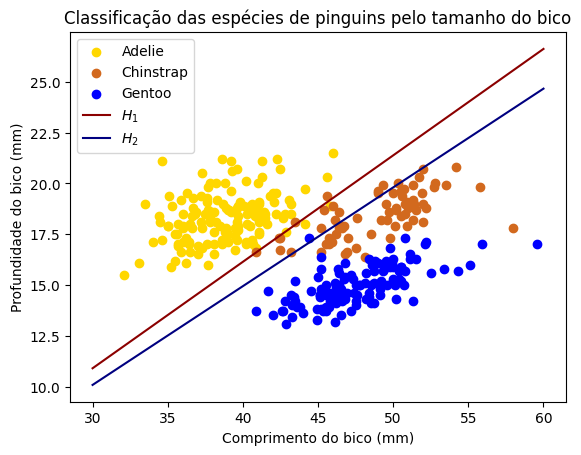

In [12]:
indices = df_p.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=2213855
)

novo_p_treino = df_p.loc[indices_treino]
novo_p_teste = df_p.loc[indices_teste]

modelo_l.fit(novo_p_treino[["bill_length_mm", "bill_depth_mm"]], novo_p_treino[["species"]])

novo_previsoes_pl = modelo_l.predict(novo_p_teste[["bill_length_mm", "bill_depth_mm"]])

a_novo = modelo_l.coef_
b_novo = modelo_l.intercept_

h1_x2 = [30,60]
h1_y2 = [(a_novo[0][0]*30 + b_novo[0])/-a_novo[0][1], (a_novo[0][0]*60 + b_novo[0])/-a_novo[0][1]]

h2_x2 = [30,60]
h2_y2 = [(a_novo[1][0]*30 + b_novo[1])/-a_novo[1][1], (a_novo[1][0]*60 +b_novo[1])/-a_novo[1][1]]

plt.scatter(bcomp_a,bprof_a, color = "gold", label = "Adelie")
plt.scatter(bcomp_c,bprof_c, color = "chocolate", label = "Chinstrap")
plt.scatter(bcomp_g,bprof_g, color = "blue", label = "Gentoo")
plt.xlabel("Comprimento do bico (mm)")
plt.ylabel("Profundidade do bico (mm)")

plt.plot(h1_x2,h1_y2, color = "darkred", label = "$H_1$")
plt.plot(h2_x2,h2_y2, color = "navy", label = "$H_2$")

plt.title("Classificação das espécies de pinguins pelo tamanho do bico")
plt.legend()
plt.show()

[Text(0.5, 23.52222222222222, 'PREVISÕES'),
 Text(50.722222222222214, 0.5, 'TARGET')]

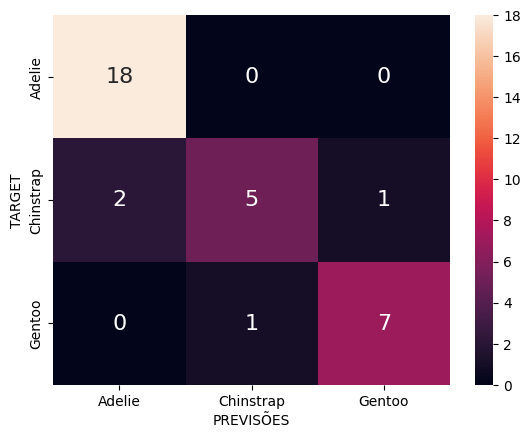

In [13]:
matriz_conf = confusion_matrix(novo_p_teste["species"], novo_previsoes_pl, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sb.heatmap(df_conf, annot=True, annot_kws={"size": 16}).set(xlabel="PREVISÕES", ylabel="TARGET")

In [14]:
print(classification_report(novo_p_teste["species"], novo_previsoes_pl, target_names=ordem_labels))

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        18
   Chinstrap       0.83      0.62      0.71         8
      Gentoo       0.88      0.88      0.88         8

    accuracy                           0.88        34
   macro avg       0.87      0.83      0.85        34
weighted avg       0.88      0.88      0.88        34



Nesta nova aplicação do modelo `SVC(kernel="linear)`, podemos notas como, de fato, a classificação de pinguins não é tão precisa, apesar de ainda apresentar bons resultados.

É possível fazer o mesmo processo para hiperplanos não lineares, entretanto, não é possível recuperar as curvas que classificam os dados.

In [15]:
modelo = SVC()

modelo.fit(p_treino[["bill_length_mm", "bill_depth_mm"]], p_treino[["species"]])

previsoes_p = modelo.predict(p_teste[["bill_length_mm", "bill_depth_mm"]])

acertos = []
for i,j in zip(p_teste["species"],previsoes_p):
    if i == j:
        acertos.append(True)
    else:
        acertos.append(False)

p_results = {
    "Comprimento do Bico": p_teste["bill_length_mm"],
    "Profundidade do Bico": p_teste["bill_depth_mm"],
    "Target": p_teste["species"],
    "Previsões" : previsoes_p,
    "Acertou?": acertos
}

df_p_res = pd.DataFrame.from_dict(p_results)
df_p_res

c:\venv\ilumpy\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Comprimento do Bico,Profundidade do Bico,Target,Previsões,Acertou?
228,43.3,13.4,Gentoo,Gentoo,True
109,43.2,19.0,Adelie,Adelie,True
225,46.5,13.5,Gentoo,Gentoo,True
135,41.1,17.5,Adelie,Adelie,True
320,48.5,15.0,Gentoo,Gentoo,True
340,46.8,14.3,Gentoo,Gentoo,True
249,50.0,15.3,Gentoo,Gentoo,True
37,42.2,18.5,Adelie,Adelie,True
127,41.5,18.3,Adelie,Adelie,True
288,43.5,14.2,Gentoo,Gentoo,True


[Text(0.5, 23.52222222222222, 'PREVISÕES'),
 Text(50.722222222222214, 0.5, 'TARGET')]

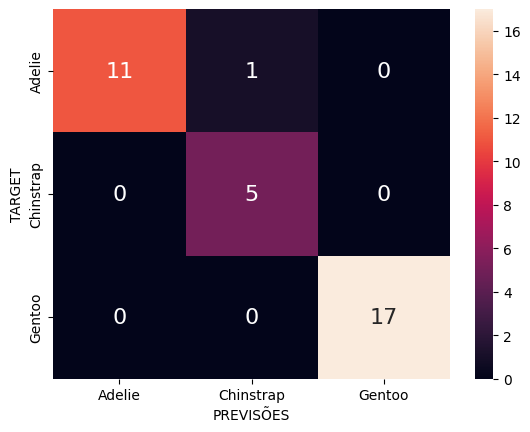

In [16]:
matriz_conf = confusion_matrix(p_teste["species"], previsoes_p, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sb.heatmap(df_conf, annot=True, annot_kws={"size": 16}).set(xlabel="PREVISÕES", ylabel="TARGET")

In [17]:
print(classification_report(p_teste["species"], previsoes_p, target_names=ordem_labels))

              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96        12
   Chinstrap       0.83      1.00      0.91         5
      Gentoo       1.00      1.00      1.00        17

    accuracy                           0.97        34
   macro avg       0.94      0.97      0.96        34
weighted avg       0.98      0.97      0.97        34



Assim, o modelo não-linear também apresentou um excelente desempenho, com acurácia de 97%.

### <font color=darkred> Importando dados de corpos d'água
Sabendo o funcionamento do `SVC`, podemos aplicá-lo aos dados de potabilidade de água.
    
Primeiramente, importaremos o *dataset* baixado e realizaremos o *split* treino-teste.

In [18]:
local=os.getcwd()

df = pd.read_csv(local+'\\water_potability.csv')
df = df.dropna()

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [19]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2110024

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

In [20]:
df_treino

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
52,6.652488,145.010172,19871.788448,4.961066,288.052192,545.974994,10.942024,71.727414,3.742090,0
1059,7.617149,196.606942,27080.268722,7.382755,345.179887,329.016646,8.547283,60.144702,2.391540,0
3209,4.857803,222.399990,15668.273618,7.900790,320.394529,417.804063,15.530563,84.228774,3.966571,1
2211,4.808040,186.160570,19118.050299,7.054444,359.406236,577.491371,8.304288,73.153089,3.597760,0
1331,6.057068,184.373232,14807.268490,5.753405,384.821967,462.006170,14.753055,34.265860,4.371748,0
...,...,...,...,...,...,...,...,...,...,...
2595,7.682762,211.663852,12723.342101,6.672341,380.945603,360.107441,14.175317,69.949675,5.044306,0
2496,6.057905,149.122794,23603.501870,6.537028,302.698631,393.293478,17.615229,54.217939,4.269753,0
660,7.543931,192.234541,24227.961139,7.241343,336.151050,369.427699,18.188873,70.588507,3.703191,1
1403,7.721033,203.354788,35800.699273,7.683399,312.919044,424.966995,18.092608,96.442129,4.168487,0


In [21]:
df_teste

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1342,8.248703,201.338857,24912.879705,7.877666,389.088844,415.683448,12.842048,51.859151,3.540532,0
452,7.040245,192.955983,20988.429410,6.422359,320.948844,381.357350,15.396455,88.298465,3.993410,0
192,7.362737,185.692181,16268.448606,5.317019,316.918648,419.258448,16.024246,64.678914,4.408513,0
2504,4.851104,146.627237,20227.643783,6.340534,368.941214,346.520310,15.266726,56.989926,3.644107,0
1177,5.484151,196.791251,19378.359067,5.003731,295.591019,348.399033,18.713876,76.414153,4.438858,1
...,...,...,...,...,...,...,...,...,...,...
2053,3.846454,211.757205,14686.283390,7.557873,326.912134,371.269374,21.765170,35.781529,3.143431,0
2307,9.808258,220.049574,34132.067979,9.752751,233.870327,367.044379,13.498665,62.954260,4.481261,1
2439,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,1
212,5.304143,160.968358,25299.511557,6.286043,300.500689,497.790391,15.013030,61.115513,4.165724,0


Para a previsão da potabilidade, escolhemos utilizar três atributos selecionados na missão *Modelos 4 - Hipótese 4*. Novamente, plotamos um gráfico que relaciona os atributos às duas classes por meio de cores.

In [22]:
atr_treino = df_treino[["ph","Chloramines","Turbidity"]]
target_treino = df_treino["Potability"]

atr_teste = df_teste[["ph","Chloramines","Turbidity"]]
target_teste = df_teste["Potability"]

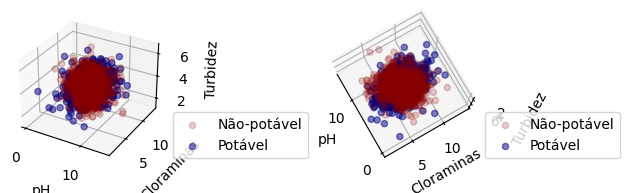

In [23]:
from mpl_toolkits.mplot3d import Axes3D

n = len(df)

ph = list(df["ph"])
chlor = list(df["Chloramines"])
turb = list(df["Turbidity"])
pot = list(df["Potability"])

ph0 = []
chlor0 = []
turb0 = []
ph1 = []
chlor1 = []
turb1 = []

for i in range(n):
    if pot[i]== 0:
        ph0.append(ph[i])
        chlor0.append(chlor[i])
        turb0.append(turb[i])
    elif pot[i]== 1:
        ph1.append(ph[i])
        chlor1.append(chlor[i])
        turb1.append(turb[i])

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')

#ax1.view_init(elev=45, azim=45)
    
ax1.scatter(ph0, chlor0, turb0, color = "darkred", label = "Não-potável", alpha = 0.2)
ax1.scatter(ph1, chlor1, turb1, color = "navy", label = "Potável", alpha= 0.5)

ax1.legend(loc='lower left', bbox_to_anchor=(1, 0), borderaxespad=0.5)
ax1.set_xlabel('pH')
ax1.set_ylabel('Cloraminas')
ax1.set_zlabel('Turbidez')

ax2 = fig.add_subplot(122, projection='3d')

ax2.view_init(elev=-100, azim = 30)
 
ax2.scatter(ph0, chlor0, turb0, color = "darkred", label = "Não-potável", alpha = 0.2)
ax2.scatter(ph1, chlor1, turb1, color = "navy", label = "Potável", alpha = 0.5)

ax2.legend(loc='lower left', bbox_to_anchor=(1, 0), borderaxespad=0.5)
ax2.set_xlabel('pH')
ax2.set_ylabel('Cloraminas')
ax2.set_zlabel('Turbidez')

plt.tight_layout()

Pela dispersão dos dados, vista em diferentes ângulos, percebe-se que as classes estão igualmente distribuídas pelo espaço, sendo muito difícil visualizar um hiperplano que as divida bem. Isso antecipa que o algoritimo de classificação por vetores de suporte pode não ser efetivo para este conjunto de dados.

Apliquemos, então, o `SVC` para previsão da potabilidade da água, sendo que potabilidade 0 significa que a amostra não é potável e que potabilidade 1 significa que a amostra é potável.

In [24]:
modelo_l.fit(atr_treino, target_treino)

previsoes_l = modelo_l.predict(atr_teste)

acertos = []
for i,j in zip(target_teste,previsoes_l):
    if i == j:
        acertos.append(True)
    else:
        acertos.append(False)

p_results = {
    "Target": target_teste,
    "Previsões" : previsoes_l,
    "Acertou?": acertos
}

df_l_res = pd.DataFrame.from_dict(p_results)
df_l_res

,Target,Previsões,Acertou?
1342,0,0,True
452,0,0,True
192,0,0,True
2504,0,0,True
1177,1,0,False
...,...,...,...
2053,0,0,True
2307,1,0,False
2439,1,0,False
212,0,0,True


[Text(0.5, 23.52222222222222, 'PREVISÕES'),
 Text(50.722222222222214, 0.5, 'TARGET')]

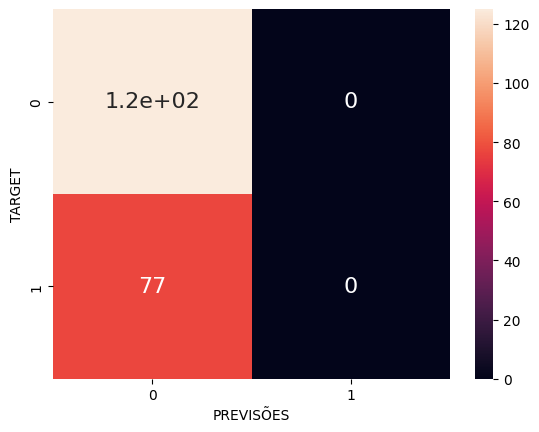

In [25]:
ordem_labels = ordem_labels = df["Potability"].unique().tolist()

matriz_conf = confusion_matrix(target_teste, previsoes_l, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sb.heatmap(df_conf, annot=True, annot_kws={"size": 16}).set(xlabel="PREVISÕES", ylabel="TARGET")

Para metrificar tal previsão, vamos calcular a acurácia, a precisão (ou valor predito positivo) e o valor predito negativo.

A acurácia calcula quantas previsões, entre todas feitas no modelo, foram verdadeiras, e é dada por:

$$
\mathrm{ACC = \frac{VP + VN}{VP + FP + VN + FN}}.
$$

A precisão, ou valor predito positivo, calcula, entre as previsões que indicaram valor 1, foram verdadeiras, e é dada por:

$$
\mathrm{PPV = \frac{VP}{VP + FP}}.
$$

Já o valor predito negativo, complementando a precisão, calcula, entre as previsões que indicaram valor 0, foram verdadeiras, e é dada por:

$$
\mathrm{NPV = \frac{VN}{VN + FN}}.
$$

In [26]:
vn = df_conf[0][0]
vp = df_conf[1][1]
fp = df_conf[1][0]
fn = df_conf[0][1]

acc = (vp+vn)/(vp+fp+vn+fn)
ppv = vp/(vp+fp)
npv = vn/(vn+fn)

print(f"A acurária do modelo classificador foi de {acc}.")
print(f"A precisão do modelo classificador foi de {ppv}.")
print(f"O valor predito negativo do modelo classificador foi de {npv}.")

A acurária do modelo classificador foi de 0.6188118811881188.
A precisão do modelo classificador foi de nan.
O valor predito negativo do modelo classificador foi de 0.6188118811881188.


C:\Users\yasmin24023\AppData\Local\Temp\ipykernel_26488\3652808455.py:7: RuntimeWarning: invalid value encountered in scalar divide
  ppv = vp/(vp+fp)


Para o *kernel* linear, é possível perceber que o `SVC` não conseguiu prever um bom hiperplano para cassificar os dados, de modo que, para todos os valores de atributos, o modelo previu a mesma classe: não potável. Desse modo, a acurácia foi baixa, assim como o valor predito negativo, e a precisão foi indefinida visto que envolve uma divisão por zero ($\frac{\mathrm{vp}=0}{\mathrm{vp}=0 + \mathrm{fp} = 0}$).

Podemos puxar os coeficientes encontrados para analisar o hiperplano definido:

In [27]:
a = modelo_l.coef_
b = modelo_l.intercept_

print(f"Os coeficientes encontrados pelo algoritmo foram:" )
print(f"{a}.")
print("")
print(f"Os interceptos encontrados pelo algoritmo foram: {b}.")

Os coeficientes encontrados pelo algoritmo foram:
[[ 6.97756225e-05  2.23905213e-05 -9.18990671e-05]].

Os interceptos encontrados pelo algoritmo foram: [-1.00031133].


Assim, como todos os coeficientes foram muito próximos de zero, podemos notar que o hiperplano encontrado foge do núcleo de dados, de modo que, de fato, tal método não deve ser utilizado para este *dataset*.

Apliquemos, então, o `SVC()` com *kernel* não-linear padrão, visando um melhor desempenho do algoritmo.

In [28]:
modelo.fit(atr_treino, target_treino)

previsoes = modelo.predict(atr_teste)

acertos = []
for i,j in zip(target_teste,previsoes):
    if i == j:
        acertos.append(True)
    else:
        acertos.append(False)

results = {
    "Target": target_teste,
    "Previsões" : previsoes,
    "Acertou?": acertos
}

df_res = pd.DataFrame.from_dict(results)
df_res

,Target,Previsões,Acertou?
1342,0,0,True
452,0,0,True
192,0,0,True
2504,0,0,True
1177,1,0,False
...,...,...,...
2053,0,0,True
2307,1,0,False
2439,1,0,False
212,0,0,True


[Text(0.5, 23.52222222222222, 'PREVISÕES'),
 Text(50.722222222222214, 0.5, 'TARGET')]

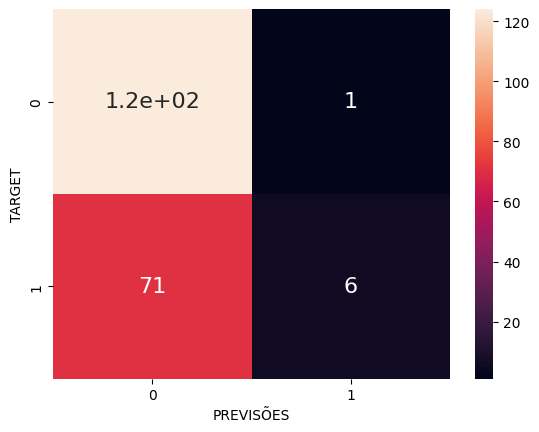

In [29]:
ordem_labels = ordem_labels = df["Potability"].unique().tolist()

matriz_conf = confusion_matrix(target_teste, previsoes, labels=ordem_labels)
df_conf = pd.DataFrame(matriz_conf, ordem_labels, ordem_labels)
sb.heatmap(df_conf, annot=True, annot_kws={"size": 16}).set(xlabel="PREVISÕES", ylabel="TARGET")

In [30]:
vn = df_conf[0][0]
vp = df_conf[1][1]
fp = df_conf[1][0]
fn = df_conf[0][1]

acc = (vp+vn)/(vp+fp+vn+fn)
ppv = vp/(vp+fp)
npv = vn/(vn+fn)

print(f"A acurária do modelo classificador foi de {acc}.")
print(f"A precisão do modelo classificador foi de {ppv}.")
print(f"O valor predito negativo do modelo classificador foi de {npv}.")

A acurária do modelo classificador foi de 0.6435643564356436.
A precisão do modelo classificador foi de 0.8571428571428571.
O valor predito negativo do modelo classificador foi de 0.6358974358974359.


Com hiperplanos não-lineares, pode-se observar um desempenho um pouco melhor do algoritmo, com as divisões entre as classe um pouco mais adequada aos dados. Entretanto, este ainda apresenta baixa acurácia e valor predito negativo, com precisão razoável. Isso se dá pela dispersão dos dados no plano, como apresentado anteriormente, que não apresenta uma classificação clara dos dados. 

Uma das possíveis origens desse problema é a correlação entre as colunas do *dataset* estudado.

In [31]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


Observando a correlação entre as colunas definidas pelo *dataset*, percebe-se haver uma correlação muito baixa entre os dados, de modo que, de fato, não seja possível identificar com clareza os critérios que definem a potabilidade da água - assim como sua dureza (outro *target* utilizado pelo grupo) e a relação dos atributos entre si. Desse modo, os dados são muito dispersos pelo espaço e sem uma classificação clara, de modo que o `SVD` não seja adequado para a previsão neste conjunto de dados, independente dos atributos utilizados.

### <font color=darkred> Conclusão
    
O *Support Vector Machine* é um algoritmo de classificação e regressão que define hiperplanos para delimitar regiões e prever dados em aprendizado de máquina. Desse modo, aplicando o classificador `SVC` do `scikit-learn` a dois conjuntos de dados, foi posível notar que tal algoritmo pode ou não ser efetivo a depender das características dos dados estudados. Para dados com alta correlação e com critérios de classificação bem definidos - de maneira até mesmo visual, com a plotagem de gráficos -, o algoritmo se mostra efetivo para classificação, com acurácia maior que 95%. Já para dados com baixíssima correlação e com a classificação mal definida, o modelo já não se mostra ideal, sem definir hiperplanos que de fato dividam as classes de dados, apresentando métricas ruins.

### Referências

Water Quality. Disponível em: <https://www.kaggle.com/datasets/adityakadiwal/water-potability>. Acesso em: 7 de Set. 2024.

SCIKIT-LEARN. Support Vector Machines. Disponível em: https://scikit-learn.org/stable/modules/svm.html. Acesso em: 28 out. 2024.

SCIKIT-LEARN. SVC. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. Acesso em: 28 out. 2024.

WIKIPEDIA. Support vector machine. Disponível em: https://en.wikipedia.org/wiki/Support_vector_machine. Acesso em: 28 out. 2024.

CÓDIGO FLUENTE. Aula 08: Scikit-learn - Máquina de Vetores de Suporte. Disponível em: https://www.codigofluente.com.br/aula-08-scikit-learn-maquina-de-vetores-de-suporte/. Acesso em: 28 out. 2024.

CASSAR, DR. ATP-203 9.1 - Classificação binária. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 10.0 - Outras métricas de classificação. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

SEABORN. heatmap. Disponível em: https://seaborn.pydata.org/generated/seaborn.heatmap.html. Acesso em: 28 out. 2024.

MATPLOTLIB. Axes3D.view_init. Disponível em: https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.view_init.html. Acesso em: 28 out. 2024.